In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pixar_movies=pd.read_csv("PixarMovies.csv")
pixar_movies.head(3)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3,0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1,0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1,0


In [4]:
pixar_movies.shape

(15, 16)

In [5]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [6]:
pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


You may have noticed that the last row, describing the movie Inside Out, is missing values for Oscars Nominated and Oscars Won. This is because the dataset is only upto date as of November 2015 and doesn't contain the Oscar nomations or results. Let's avoid using data on Inside Out for any plots involving revenue figures or the Oscars since those values aren't complete yet. In addition, you may have noticed that the IMDB Score column is on a 10 point scale while the RT Score and Metacritic Score columns are on a 100 point scale. We need to convert the IMDB scores to a 100 point scale so we can compare how the movies fared across these different review sites.

Since we'll be using some of the Pandas plotting methods, we need to set the Movie column (containing the film names) as the index for the DataFrame so the movie names are included in the plot. Lastly, Pandas treated the Domestic % and International % columns as the object data type (the equivalent of string). This is mostly because these columns' values contain percentage signs (%) as the last character and can't be directly cast as float values. We need to strip the percentage sign from the end of the values in this column and then convert the column to the float data type so we can.

Let's clean up the pixar_movies DataFrame first then create the filtered DataFrame containing the first 14 rows at the end, so we don't have to repeat the cleanup for both DataFrames.

In [7]:
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype("float")
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype("float")

In [8]:
pixar_movies["IMDB Score"]=pixar_movies["IMDB Score"]*10

Create a new DataFrame named filtered_pixar with the last row, describing Inside Out, filtered out.

In [9]:
#filtered_pixar=pixar_movies.dropna()
filtered_pixar=pixar_movies.loc[0:13]

In [20]:
pixar_movies.set_index(['Movie'], inplace=True)
filtered_pixar.set_index(['Movie'],  inplace=True)

Now that the average reviews for each movie from the 3 major review sites are all on a 100 point scale, we can ask the question:

How do the Pixar films fare across each of the major review sites?
Let's generate the following 3 line plots:

Rotten Tomatoes score on the y-axis, movie name on the x-axis.
IMDB score on the y-axis, movie name on the x-axis.
Metacritic score on the y-axis, movie name on the x-axis.
Let's plot these line plots on the same plotting area so we can easily compare how each movie fared across the review sites.

In [21]:
critics_reviews = pixar_movies[["RT Score","Metacritic Score","IMDB Score"]]

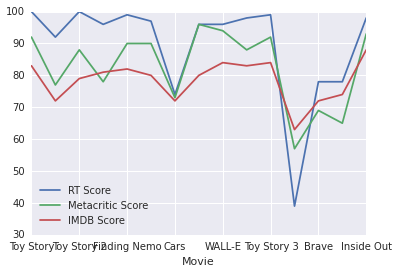

In [22]:
critics_reviews.plot()

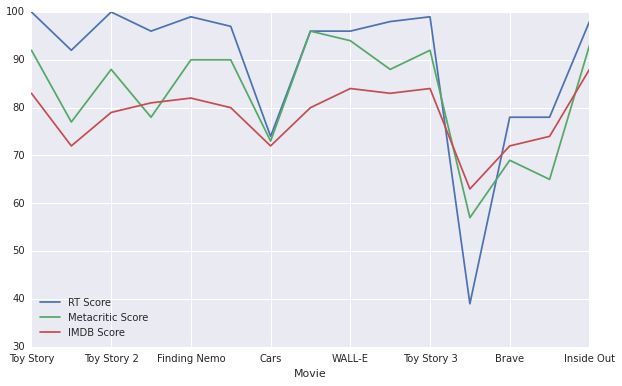

In [23]:
critics_reviews.plot(figsize=(10,6))

From the previous plot, it seems like the review site Rotten Tomatoes gives Pixar consistently higher ratings. Let's generate a box plot to explore the question:

How are the average ratings from each review site across all the movies distributed?
A box plot is useful here since we can visually compare the box part to determine where the central tendency of each distribution lies and the whiskers to see how spread out each distribution is.

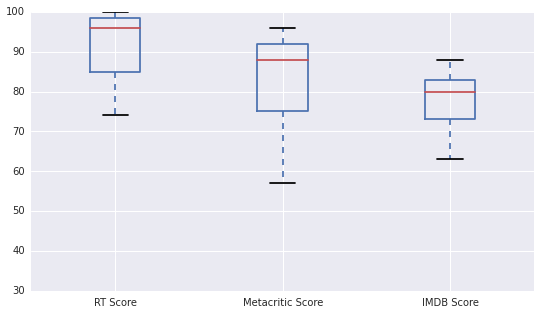

In [24]:
pixar_movies[["RT Score","Metacritic Score","IMDB Score"]].plot(kind="box",figsize=(9,5))

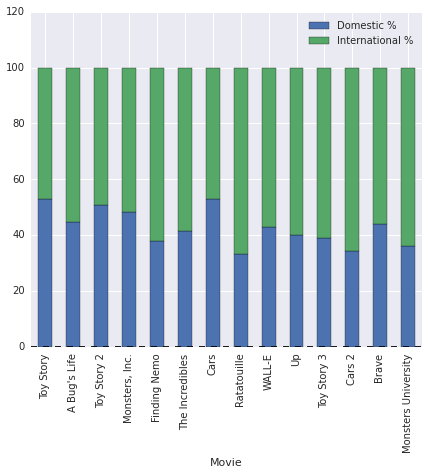

In [25]:
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]
revenue_proportions.plot(kind='bar', stacked=True, figsize=(7,6))

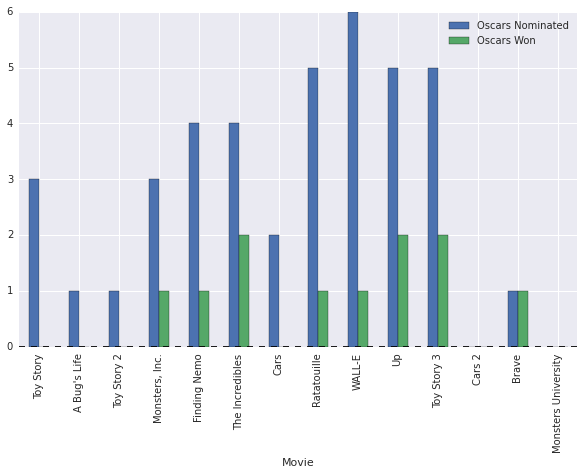

In [27]:
filtered_pixar[["Oscars Nominated","Oscars Won"]].plot(kind='bar', figsize=(10,6))

In this guided project, we practiced cleaning, exploring, and visualizing a dataset on Pixar movies. In the beginning, we focused on getting familiar with the dataset and preparing the data for visualization. Then, we generated line plots and a box plot to explore how the movies fared across the major review sites. Lastly, we learned how to create a stacked bar plot to compare proportional values easily.

We encourage you to continue exploring the dataset by formulating your own questions and exploring new types of data visualizations. Here are some ideas:

Create a grouped bar plot to explore if there's any correlation between the number of Oscars a movie was nominated for and the number it actually won.
What plots can you generate to better understand which columns correlate with the Adjusted Domestic Gross revenue column?